## Importing necessary libraries!!

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading datasets

In [318]:
training_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/summer_analytics_iitg/HACKATHON/dataset and all/training_set_features.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/summer_analytics_iitg/HACKATHON/dataset and all/test_set_features.csv')
training_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/summer_analytics_iitg/HACKATHON/dataset and all/training_set_labels.csv')
submission_format = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/summer_analytics_iitg/HACKATHON/dataset and all/submission_format.csv')

## Checking for Datatypes and Non-Null count of features in training data

In [319]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### How many percentage values of features are NaN

In [320]:
# Noticed a bunch of missing data, so a glance at the numbers was necessary
training_data.isna().mean()*100

respondent_id                   0.000000
xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [321]:
test_data.isna().mean()*100

respondent_id                   0.000000
xyz_concern                     0.318257
xyz_knowledge                   0.456792
behavioral_antiviral_meds       0.295792
behavioral_avoidance            0.797514
behavioral_face_mask            0.071140
behavioral_wash_hands           0.149768
behavioral_large_gatherings     0.269582
behavioral_outside_home         0.307024
behavioral_touch_face           0.479257
doctor_recc_xyz                 8.087464
doctor_recc_seasonal            8.087464
chronic_med_condition           3.489591
child_under_6_months            3.044032
health_worker                   2.954171
health_insurance               45.784035
opinion_xyz_vacc_effective      1.490190
opinion_xyz_risk                1.422795
opinion_xyz_sick_from_vacc      1.404074
opinion_seas_vacc_effective     1.692377
opinion_seas_risk               1.868354
opinion_seas_sick_from_vacc     1.950726
age_group                       0.000000
education                       5.268084
race            

## It implies that training and testing data have same proportion of unavailable data in each feature.

Making list of Categorical and Continous features.

In [322]:
cat_cols = [col for col in training_data.columns if training_data[col].dtype == 'O']
cont_cols = [col for col in training_data.columns if col not in cat_cols]

In [323]:
cat_cols

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [324]:
cont_cols

['respondent_id',
 'xyz_concern',
 'xyz_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_xyz',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_xyz_vacc_effective',
 'opinion_xyz_risk',
 'opinion_xyz_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

## Looking at the categorical features, their unique values and count of unique values.

In [325]:
for column in training_data.columns:
    if training_data[column].dtype == 'object':
        print(column.upper(),': ',training_data[column].nunique())
        print(training_data[column].value_counts().sort_values())
        print('\n')

AGE_GROUP :  5
age_group
35 - 44 Years    3848
18 - 34 Years    5215
45 - 54 Years    5238
55 - 64 Years    5563
65+ Years        6843
Name: count, dtype: int64


EDUCATION :  4
education
< 12 Years           2363
12 Years             5797
Some College         7043
College Graduate    10097
Name: count, dtype: int64


RACE :  4
race
Other or Multiple     1612
Hispanic              1755
Black                 2118
White                21222
Name: count, dtype: int64


SEX :  2
sex
Male      10849
Female    15858
Name: count, dtype: int64


INCOME_POVERTY :  3
income_poverty
Below Poverty                 2697
> $75,000                     6810
<= $75,000, Above Poverty    12777
Name: count, dtype: int64


MARITAL_STATUS :  2
marital_status
Not Married    11744
Married        13555
Name: count, dtype: int64


RENT_OR_OWN :  2
rent_or_own
Rent     5929
Own     18736
Name: count, dtype: int64


EMPLOYMENT_STATUS :  3
employment_status
Unemployed             1453
Not in Labor Force    10231
E

In [326]:
complete_training_data = training_data[cont_cols].set_index("respondent_id").join(training_labels.set_index("respondent_id"))
complete_training_data

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0,1


## Checking correlation between Continous features and Target features.

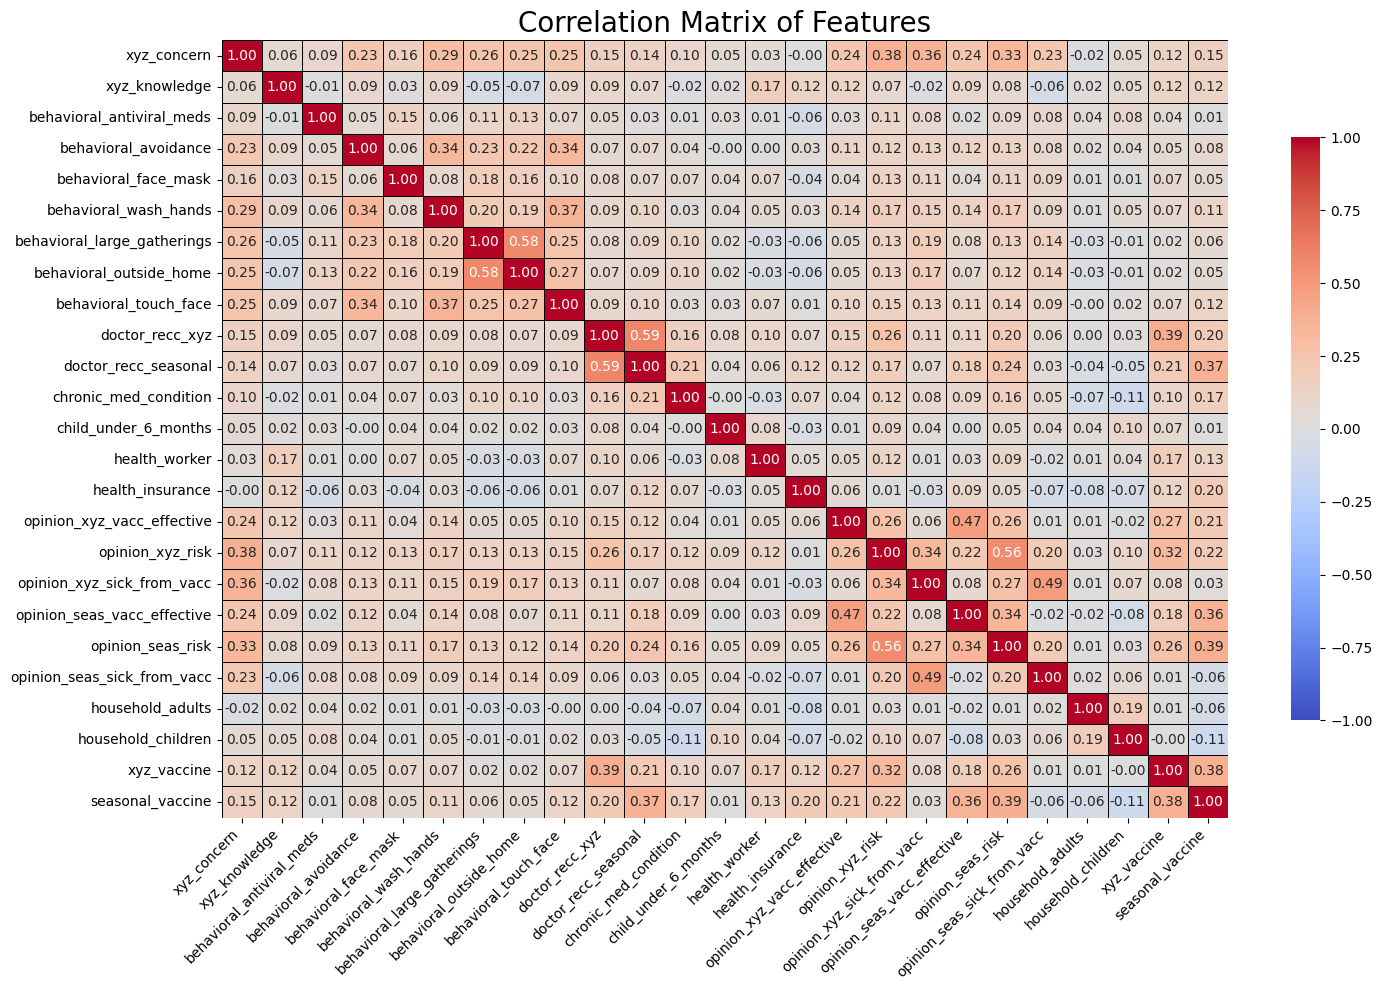

In [327]:
plt.figure(figsize = (15,10))
sns.heatmap(complete_training_data.corr(), annot = True, fmt = ".2f", cmap = "coolwarm", linewidths=0.5, linecolor = 'black', cbar_kws ={"shrink":0.75}, vmin = -1, vmax = 1)
plt.title('Correlation Matrix of Features', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() #Ensures that the layout is adjusted to fit all elements neatly within the figure.


### behavioral_outside_home and behavioral_large_gatherings are highly correlated. We can drop one of them. Similarly, doctor_recc_h1n1 and doctor_recc_seasonal are highly correlated. One of them would be dropped again.
### likewise opinion_seas_risk and opinion_xyz_risk are also highly correlated.
### but before dropping these three features lets try to find some information categorical features.

##  First handeling NaN values.

<Axes: >

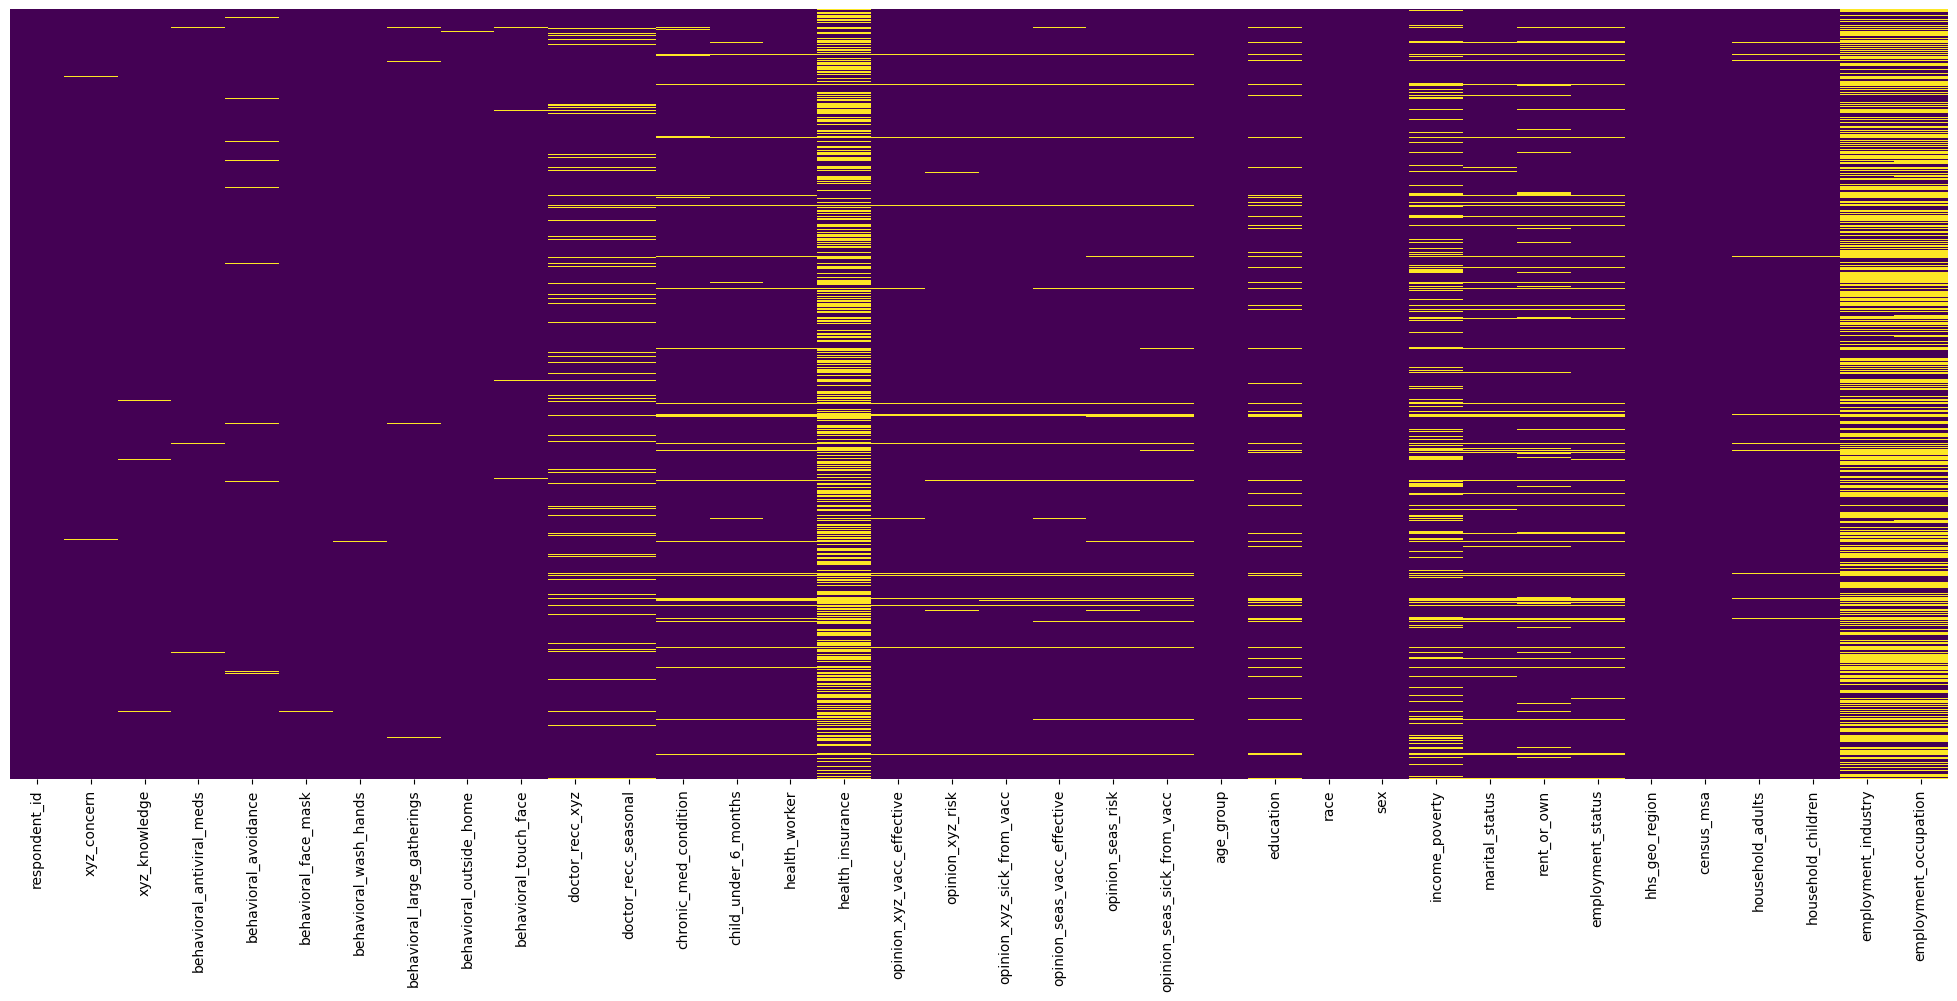

In [328]:
plt.figure(figsize = (25,10))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [329]:
# Filling most frequent value of each categorical columns in place Nan values
for column in cat_cols:
    training_data[column].fillna(training_data[column].mode()[0], inplace=True)
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

<Axes: >

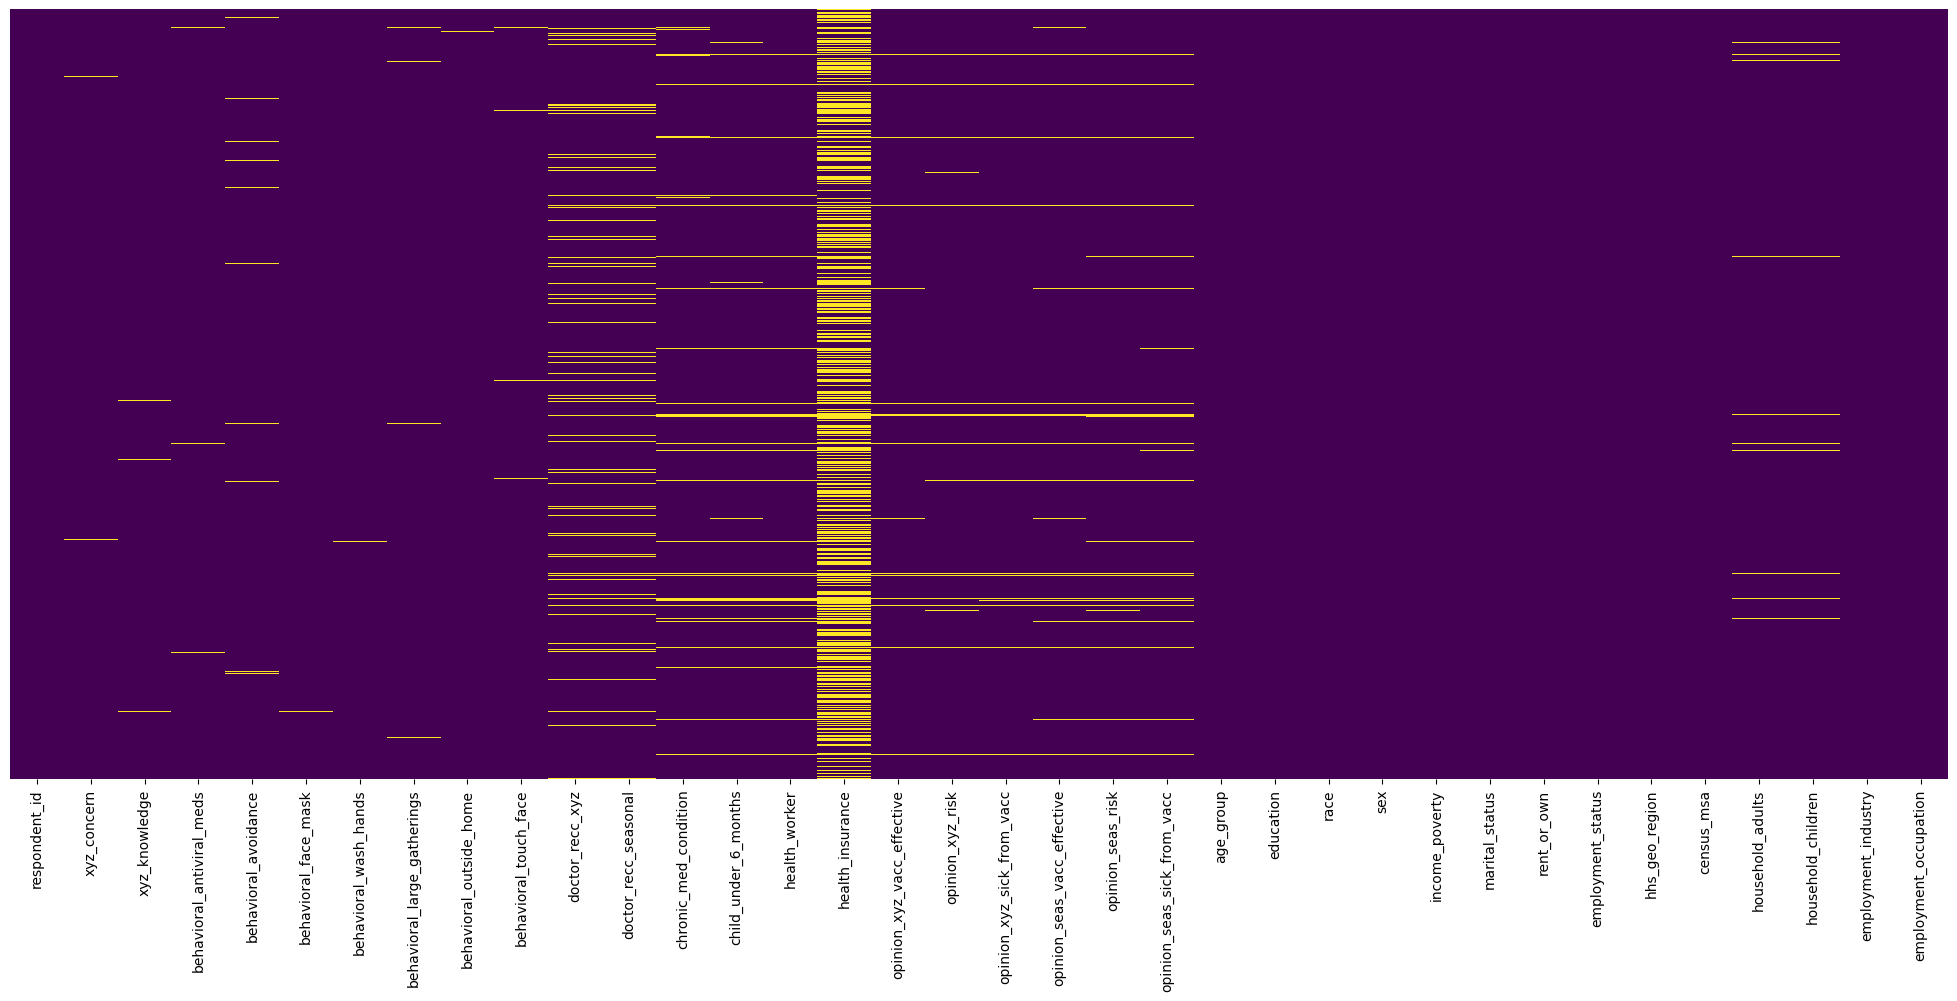

In [330]:
plt.figure(figsize = (25,10))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [331]:
# Filling median of each categorical columns in place Nan values in that columns
for i in cont_cols:
    training_data[i].fillna(training_data[i].median(),inplace=True)
    test_data[i].fillna(test_data[i].median(),inplace=True)

<Axes: >

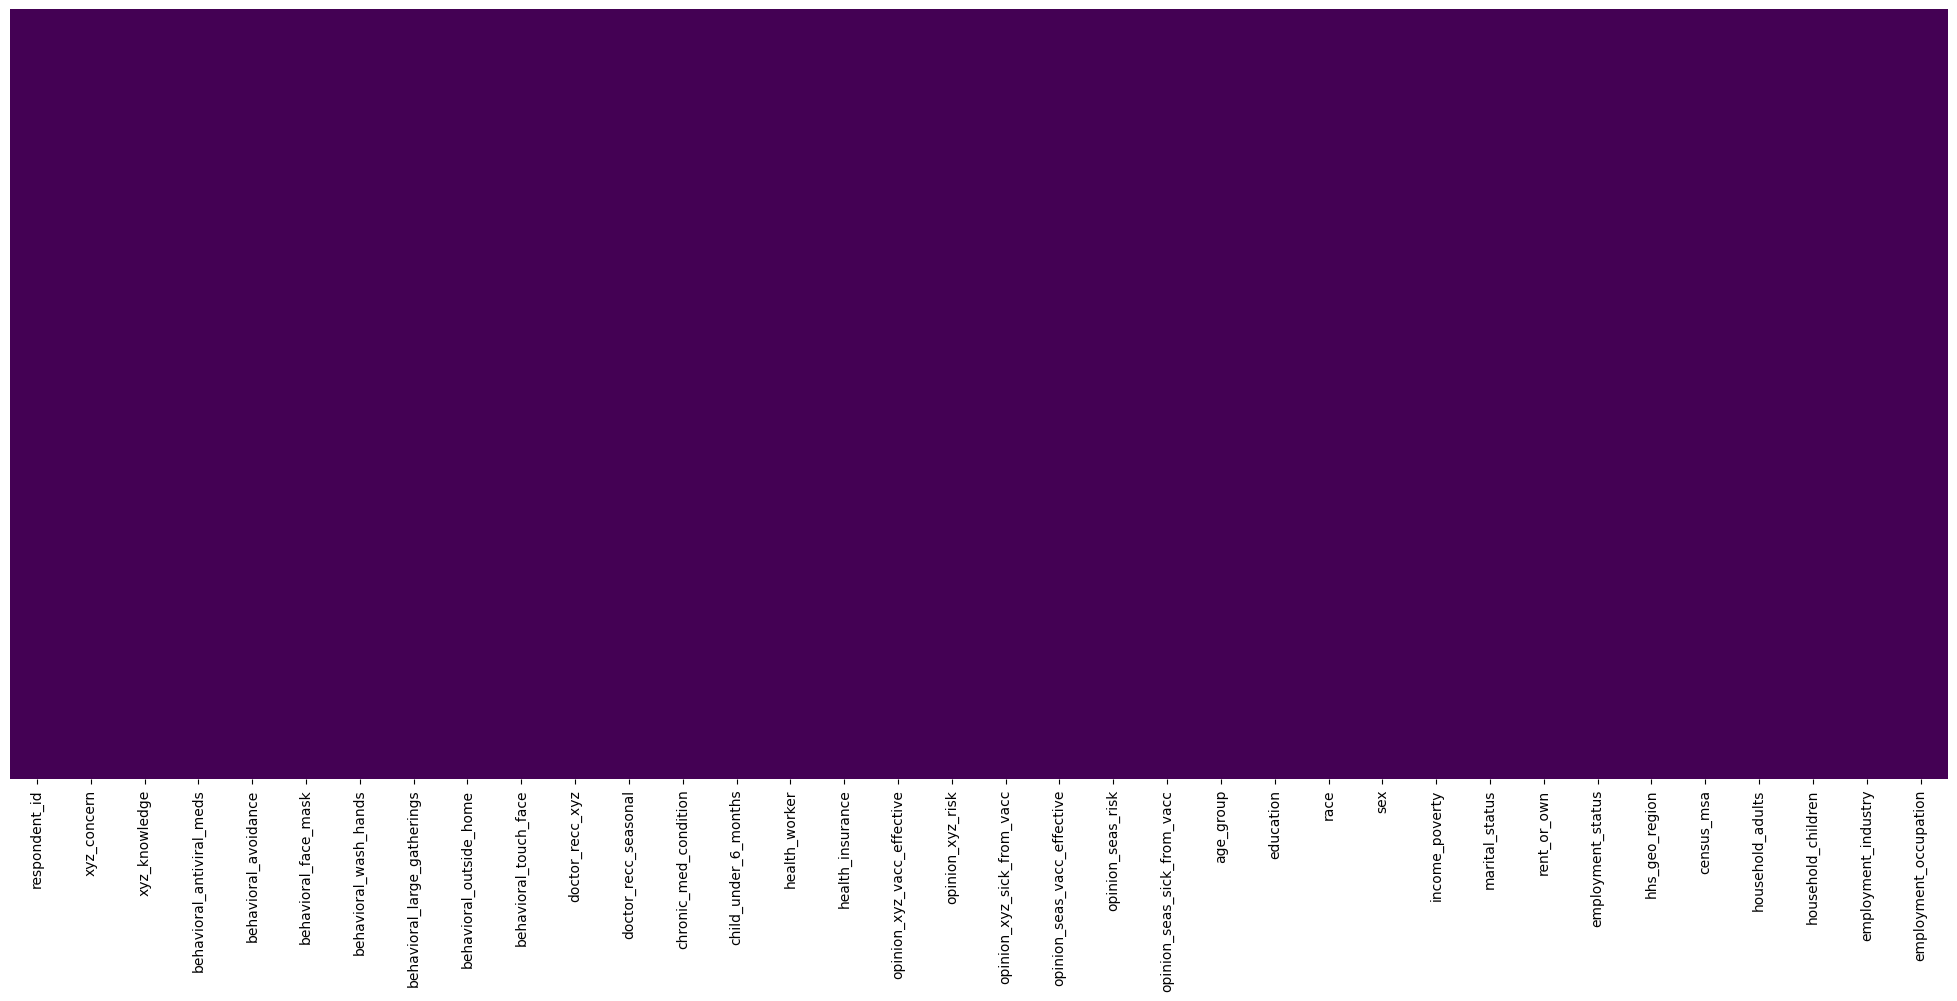

In [332]:
plt.figure(figsize = (25,10))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### We can see that now we don't have any nan values in our Dataset

### Let's look at categorical columns

In [333]:
training_data[cat_cols]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,fcxhlnwr,xtkaffoo
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",fcxhlnwr,xtkaffoo
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,fcxhlnwr,xtkaffoo
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


### Custom Encoding of categorical variables

In [334]:
custom_mappings = {
    'age_group' : {
    '18 - 34 Years': 0,
    '35 - 44 Years': 1,
    '45 - 54 Years': 2,
    '55 - 64 Years': 3,
    '65+ Years': 4
},
    'education' : {
    '< 12 Years': 14,
    '12 Years': 16,
    'Some College': 18,
    'College Graduate': 20
},
    'race' : {
    'White': 0,
    'Black': 1,
    'Hispanic': 2,
    'Other or Multiple': 3
},

    'sex' : {
    'Male': 1,
    'Female': 0
},
    'income_poverty' : {
    'Below Poverty': 0,
    '<= $75,000, Above Poverty': 1,
    '> $75,000': 2,
},
    'marital_status' : {
    'Married': 1,
    'Not Married':0
},
    'rent_or_own' : {
    'Rent': 0,
     'Own':1
},
    'employment_status' : {
    'Unemployed':0,
    'Employed': 1,
    'Not in Labor Force':2

},
    'census_msa' : {
    'Non-MSA' :0,
'MSA, Not Principle  City':1,
'MSA, Principle City':2
},
    'hhs_geo_region' : {
    'dqpwygqj'  : 0,
'atmpeygn'    :1,
'lrircsnp'    :2,
'mlyzmhmf'    :3,
'bhuqouqj'    :4,
'kbazzjca'    :5,
'oxchjgsf'    :6,
'qufhixun'    :7,
'fpwskwrf'    :8,
'lzgpxyit' :9
    },

    'employment_industry' : {
    'qnlwzans': 0, 'phxvnwax': 1, 'msuufmds': 2, 'haxffmxo': 3, 'dotnnunm': 4,
    'wlfvacwt': 5, 'mcubkhph': 6, 'nduyfdeo': 7, 'cfqqtusy': 8, 'saaquncn': 9,
    'xqicxuve': 10, 'rucpziij': 11, 'vjjrobsf': 12, 'mfikgejo': 13, 'xicduogh': 14,
    'arjwrbjb': 15, 'atmlpfrs': 16, 'pxcmvdjn': 17, 'ldnlellj': 18, 'wxleyezf': 19,
    'fcxhlnwr': 20
},
    'employment_occupation' : {
    'pvmttkik': 0, 'dcjcmpih': 1, 'hodpvpew': 2, 'dlvbwzss': 3, 'xzmlyyjv': 4,
    'rcertsgn': 5, 'haliazsg': 6, 'bxpfxfdn': 7, 'ccgxvspp': 8, 'oijqvulv': 9,
    'vlluhbov': 10, 'ukymxvdu': 11, 'tfqavkke': 12, 'uqqtjvyb': 13, 'kldqjyjy': 14,
    'xqwwgdyp': 15, 'qxajmpny': 16, 'hfxkjkmi': 17, 'xgwztkwe': 18, 'cmhcxjea': 19,
    'emcorrxb': 20, 'mxkfnird': 21, 'xtkaffoo': 22
}

}


for col in cat_cols:
    training_data[col] = training_data[col].map(custom_mappings[col])

# Apply the custom mappings to test data
for col in cat_cols:
    test_data[col] = test_data[col].map(custom_mappings[col])

In [335]:
training_data[cat_cols]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,3,14,0,0,0,0,1,2,6,0,20,22
1,1,16,0,1,0,0,0,1,4,1,17,18
2,0,20,0,1,1,0,1,1,7,1,11,22
3,4,16,0,0,0,0,0,2,2,2,20,22
4,2,18,0,0,1,1,1,1,7,1,19,20
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,4,18,0,0,1,0,1,2,7,0,20,22
26703,0,20,0,1,1,0,0,1,9,2,20,19
26704,3,18,0,0,1,0,1,1,9,1,20,22
26705,0,18,2,0,1,1,0,1,2,0,20,6


### OR
###Encoding of Categorical features using LabelEncoder in SCikit learn library

In [336]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
training_data[cat_cols] = training_data[cat_cols].apply(enc.fit_transform)
test_data[cat_cols] = test_data[cat_cols].apply(enc.fit_transform)

In [337]:
training_data[cat_cols]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,3,0,0,0,0,0,1,2,6,0,20,22
1,1,1,0,1,0,0,0,1,4,1,17,18
2,0,3,0,1,1,0,1,1,7,1,11,22
3,4,1,0,0,0,0,0,2,2,2,20,22
4,2,2,0,0,1,1,1,1,7,1,19,20
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,4,2,0,0,1,0,1,2,7,0,20,22
26703,0,3,0,1,1,0,0,1,9,2,20,19
26704,3,2,0,0,1,0,1,1,9,1,20,22
26705,0,2,2,0,1,1,0,1,2,0,20,6


Now look at training data

In [338]:
training_data

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,2,6,0,0.0,0.0,20,22
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,1,4,1,0.0,0.0,17,18
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,1,7,1,2.0,0.0,11,22
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,2,2,2,0.0,0.0,20,22
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,1,1,1,7,1,1.0,0.0,19,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,1,2,7,0,0.0,0.0,20,22
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,9,2,1.0,0.0,20,19
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,0,1,1,9,1,0.0,0.0,20,22
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,0,1,2,0,1.0,0.0,20,6


### Checking for correlation of whole Dataset

In [339]:
complete_training_data = training_data.set_index("respondent_id").join(training_labels.set_index("respondent_id"))
complete_training_data

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,2,6,0,0.0,0.0,20,22,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,4,1,0.0,0.0,17,18,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,7,1,2.0,0.0,11,22,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,2,2,2,0.0,0.0,20,22,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,1,7,1,1.0,0.0,19,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,2,7,0,0.0,0.0,20,22,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1,9,2,1.0,0.0,20,19,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1,1,9,1,0.0,0.0,20,22,0,1


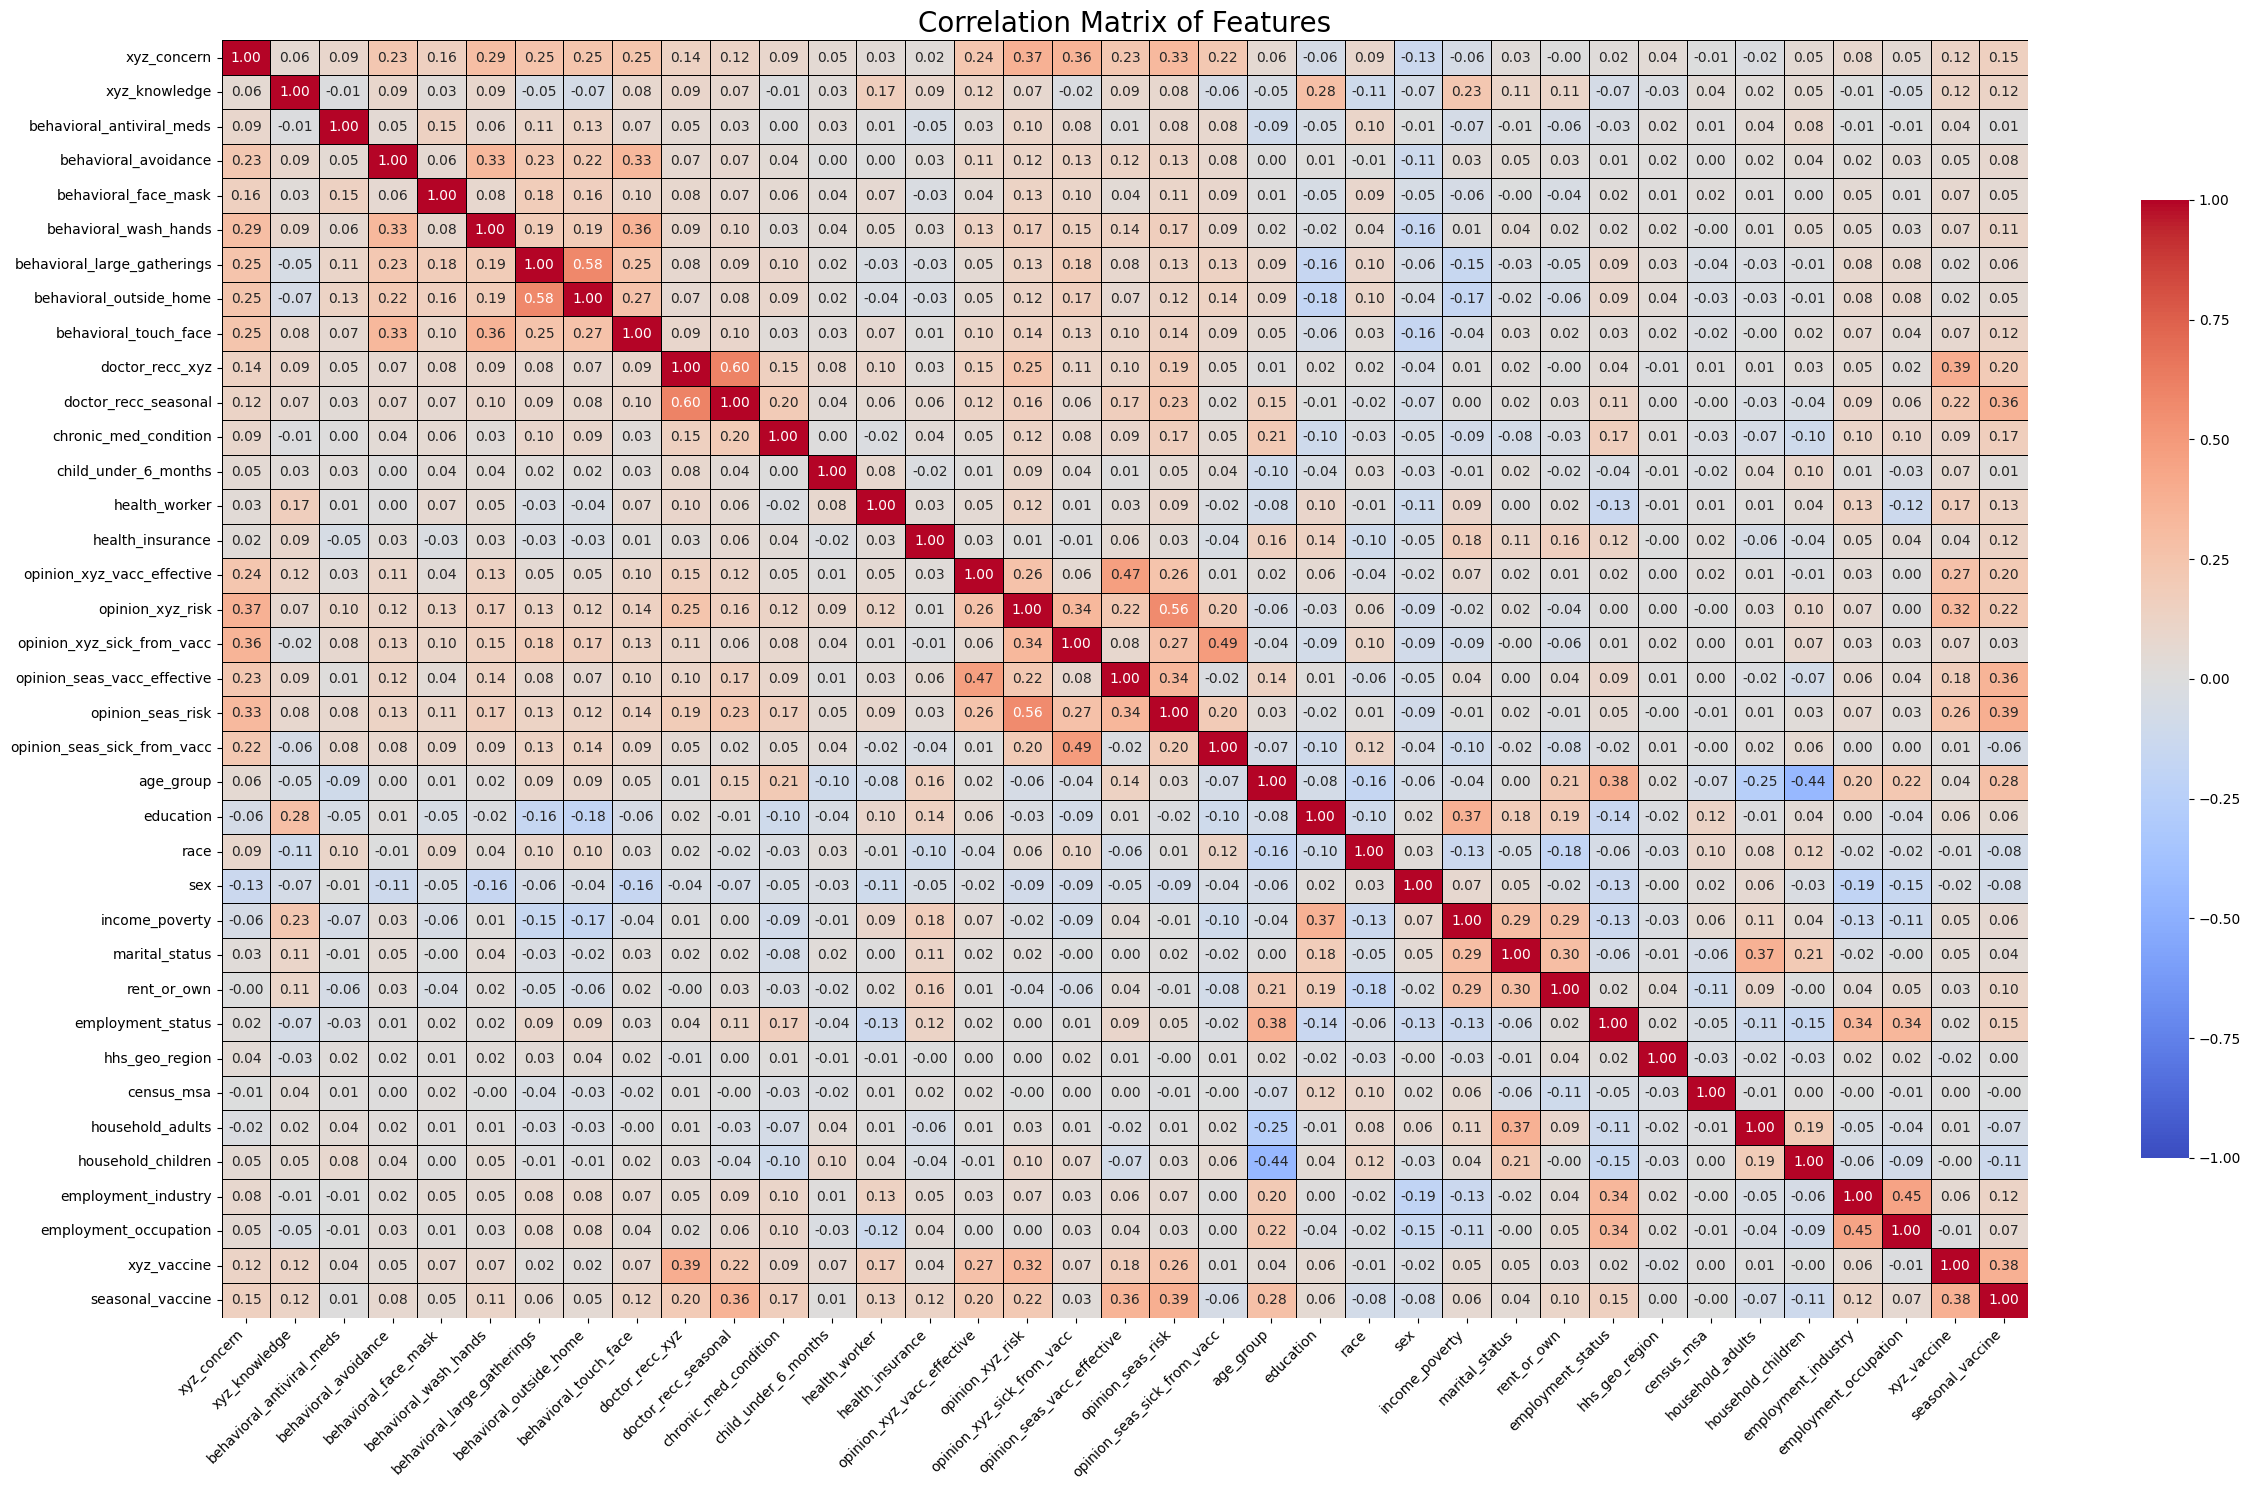

In [340]:
plt.figure(figsize = (25,15))
sns.heatmap(complete_training_data.corr(), annot = True, fmt = ".2f", cmap = "coolwarm", linewidths=0.5, linecolor = 'black', cbar_kws ={"shrink":0.75}, vmin = -1, vmax = 1)
plt.title('Correlation Matrix of Features', fontsize=20)
plt.xticks(rotation=45, ha='right') # ha = horizontal alighnment
plt.yticks(rotation=0)
plt.tight_layout() #Ensures that the layout is adjusted to fit all elements neatly within the figure.

### We can see that employment_occupation and employment_industry is also correlated.

### Now check for non null values and datatypes of each features

In [341]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [342]:
training_labels

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [343]:
x=training_data
y=training_labels[['xyz_vaccine','seasonal_vaccine']]

In [344]:
y

,xyz_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


In [345]:
test_data

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,2,0,0,1,3,1,1.0,0.0,16,17
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,4,0,3.0,0.0,16,15
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2,1,1,1,2,0,1.0,0.0,7,0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,2,2,1,1.0,0.0,20,22
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,0,1,1,9,0,0.0,1.0,20,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,1,1,1,0,2,1.0,1.0,20,22
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,1,0,1,7,0,1.0,3.0,20,10
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,2,7,1,1.0,0.0,20,22
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1,1,1,2,4,1,1.0,0.0,20,22


### Model training , here we are using Logistic Regression because I tried models like Gaussian naive bayes and support vector machine as well but they are performing either poor or same as Logistic regression.

### Using One target feature at a time for training model

## First for xyz_vaccine

[[0.59901619 0.40098381]
 [0.9259204  0.0740796 ]
 [0.89957927 0.10042073]
 ...
 [0.9751883  0.0248117 ]
 [0.96649622 0.03350378]
 [0.94156924 0.05843076]]
(5342, 2)
accuracy:  0.8365780606514414
[0.40098381 0.0740796  0.10042073 ... 0.0248117  0.03350378 0.05843076]
AUC - Test Set: 83.12%


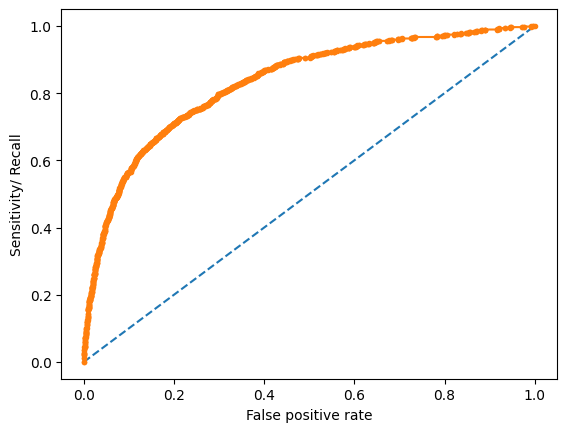

In [346]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler


# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y.iloc[:,0], test_size=0.2, random_state=100)

# Standardize the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Create and train the logistic regression classifier
model = LogisticRegression()
# model = GaussianNB()
# model = SVC(probability=True)  # Set probability=True to enable probability estimates
model.fit(X_train_scaled, y_train)

# Predict probabilities
probs = model.predict_proba(X_test_scaled)
print(probs)
print(probs.shape)

from sklearn.metrics import accuracy_score
predictions_lr = model.predict(X_test_scaled)
lr_br=accuracy_score(y_test,predictions_lr)
print("accuracy: ",lr_br)

# Keep probabilities for the positive outcome only
probs = probs[:, 1]
print(probs)
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc * 100))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the ROC curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# Show the plot
plt.show()

### Finding the probability xyz_vaccine of testing Dataset

In [347]:
X_test_scaled = sc.transform(test_data)
probs = model.predict_proba(X_test_scaled)
probs

array([[0.90821088, 0.09178912],
       [0.96123168, 0.03876832],
       [0.53069789, 0.46930211],
       ...,
       [0.88191847, 0.11808153],
       [0.94251828, 0.05748172],
       [0.43689039, 0.56310961]])

In [348]:
xyz_vaccine_ans	 = probs[:,1]
xyz_vaccine_ans

array([0.09178912, 0.03876832, 0.46930211, ..., 0.11808153, 0.05748172,
       0.56310961])

In [349]:
predictions_lr1 = model.predict(X_test_scaled)
predictions_lr1

array([0, 0, 0, ..., 0, 0, 1])

In [350]:
predictions_lr1.shape

(26708,)

In [351]:
positive_xyz = predictions_lr1.sum()
negative_xyz = len(predictions_lr1) - positive_xyz
print(positive_xyz)
print(negative_xyz)

3259
23449


## Now for seasonal vaccine

[[0.23379962 0.76620038]
 [0.92702304 0.07297696]
 [0.82975022 0.17024978]
 ...
 [0.68043403 0.31956597]
 [0.20137999 0.79862001]
 [0.25744527 0.74255473]]
(5342, 2)
accuracy:  0.7684387869711718
[0.76620038 0.07297696 0.17024978 ... 0.31956597 0.79862001 0.74255473]
AUC - Test Set: 84.27%


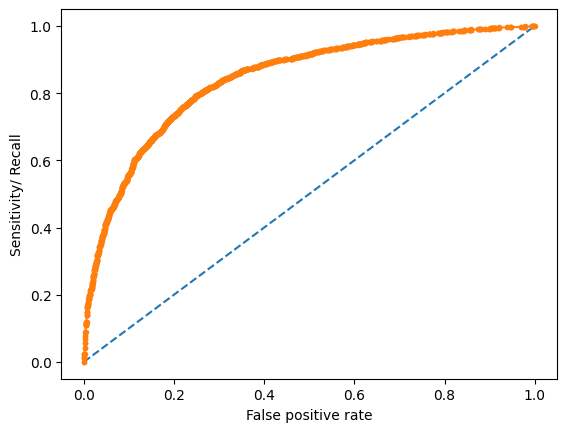

In [352]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y.iloc[:,1], test_size=0.2, random_state=100)

# Standardize the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Create and train the logistic regression classifier
model = LogisticRegression()
# model = GaussianNB()
# model = SVC(probability=True)  # Set probability=True to enable probability estimates
model.fit(X_train_scaled, y_train)

# Predict probabilities
probs = model.predict_proba(X_test_scaled)
print(probs)
print(probs.shape)

from sklearn.metrics import accuracy_score
predictions_lr = model.predict(X_test_scaled)
lr_br=accuracy_score(y_test,predictions_lr)
print("accuracy: ",lr_br)

# Keep probabilities for the positive outcome only
probs = probs[:, 1]
print(probs)
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc * 100))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the ROC curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# Show the plot
plt.show()

### Finding the probability seasonal_vaccine of testing Dataset

In [353]:
X_test_scaled = sc.transform(test_data)
probs = model.predict_proba(X_test_scaled)
probs

array([[0.7633301 , 0.2366699 ],
       [0.9722874 , 0.0277126 ],
       [0.26345037, 0.73654963],
       ...,
       [0.81901781, 0.18098219],
       [0.61104565, 0.38895435],
       [0.4787613 , 0.5212387 ]])

In [354]:
print(probs)

[[0.7633301  0.2366699 ]
 [0.9722874  0.0277126 ]
 [0.26345037 0.73654963]
 ...
 [0.81901781 0.18098219]
 [0.61104565 0.38895435]
 [0.4787613  0.5212387 ]]


In [355]:
seasonal_vaccine_ans = probs[:,1]
seasonal_vaccine_ans

array([0.2366699 , 0.0277126 , 0.73654963, ..., 0.18098219, 0.38895435,
       0.5212387 ])

In [356]:
predictions_lr2 = model.predict(X_test_scaled)
predictions_lr2

array([0, 0, 1, ..., 0, 0, 1])

In [357]:
predictions_lr2.shape

(26708,)

In [358]:
positive_seasonal = predictions_lr2.sum()
negative_seasonal = len(predictions_lr2) - positive_seasonal
print(positive_seasonal)
print(negative_seasonal)

11239
15469


Making plot of predictions

---



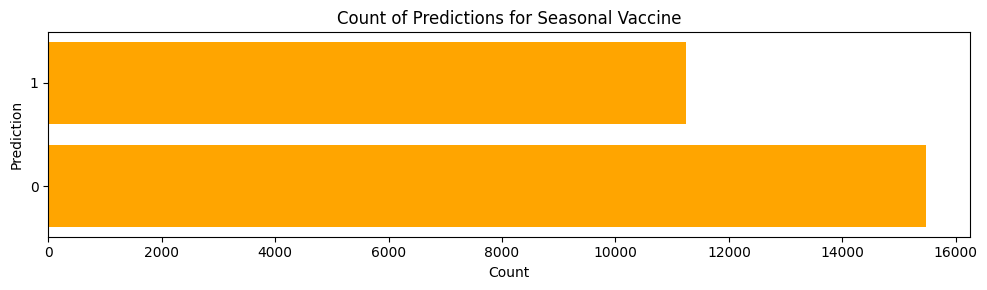

In [359]:
# Create a bar chart
labels = ['0', '1']
counts = [negative_seasonal, positive_seasonal]

plt.figure(figsize = (10,3))
# Horizontal bar chart
plt.barh(labels, counts, color='orange')
plt.title('Count of Predictions for Seasonal Vaccine')
plt.xlabel('Count')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

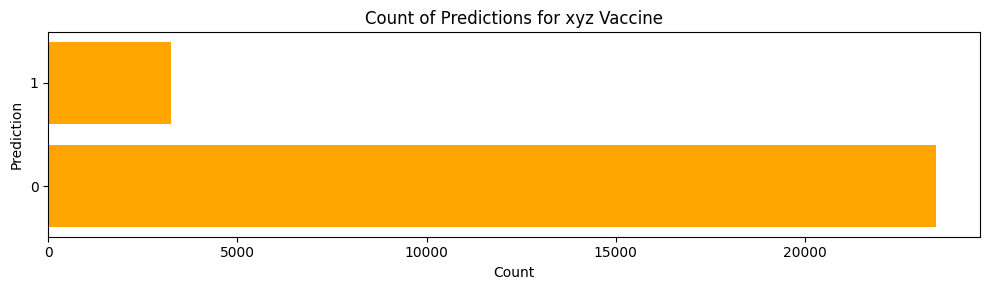

In [360]:
# Create a bar chart
labels = ['0', '1']
counts = [negative_xyz, positive_xyz]

plt.figure(figsize = (10,3))
# Horizontal bar chart
plt.barh(labels, counts, color='orange')
plt.title('Count of Predictions for xyz Vaccine')
plt.xlabel('Count')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

### Now Making our final csv submission file

In [361]:
submission_format

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7
...,...,...,...
26703,53410,0.5,0.7
26704,53411,0.5,0.7
26705,53412,0.5,0.7
26706,53413,0.5,0.7


In [362]:
submission_format.rename(columns={'h1n1_vaccine':'xyz_vaccine'},inplace=True)
submission_format

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7
...,...,...,...
26703,53410,0.5,0.7
26704,53411,0.5,0.7
26705,53412,0.5,0.7
26706,53413,0.5,0.7


In [363]:
submission_format.xyz_vaccine = xyz_vaccine_ans
submission_format.seasonal_vaccine = seasonal_vaccine_ans
submission_format

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.091789,0.236670
1,26708,0.038768,0.027713
2,26709,0.469302,0.736550
3,26710,0.468828,0.868927
4,26711,0.236369,0.514797
...,...,...,...
26703,53410,0.332006,0.486877
26704,53411,0.064147,0.154072
26705,53412,0.118082,0.180982
26706,53413,0.057482,0.388954


In [364]:
submission_format.to_csv('submission_format.csv', index=False)